# Dynamic programming algorithm for problems with finite input and state spaces
This live script provides an implementation of the dynamic programming algorithm 
for a deterministic finite-horizon optimal control problem with discrete input 
and output spaces. 

Let us start by recalling the formulation of a deterministic finite-horizon 
optimal control problem with discrete input and output spaces

$$ \min  \sum_{k=0}^{h-1} g_k( x_k, u_k ) + g_h( x_h )$$

subject to

$$ x_{k+1} = f_k( x_k, u_k ),$$

where $k\in K:=\{0,1,2,\dots,h-1\}$, $x_k\in X_k:=\{1,2,\dots,n_k\}$, 
for $k\in K \cup \{h\}$ and $u_k \in U_K(x_k):=\{1,2,\dots,m_k(x_k)\}$ for 
$k\in K$ and $x_k \in X_k$.

We need to find a good representation for this problem in terms of MATLAB 
data structures. To this effect consider the following data structures, which 
fully characterize the optimal control problem state above:
%
* M - cell object such that M{k+1}{i}{j} = $f_k(i,j)$;
* C- cell object such that C{k+1}{i}{j} = $g_k(i,j)$;
* T- vector such that T(i)=$g_h(i), \ \ i\in X_h$.

The dynamic programming algorithm will result in an optimal policy and costs-to-go. 
These can be specified by the following data structures:

* $J$ - cell object such that $J\{k+1\}\{i\}$ is the cost-to-go at stage $k$, $k\in K $, and state $i$; Note that the terminal cost is not included.
* $u$ - cell object such that $u\{k+1\}\{i\}$ is a vector of indices $j$ corresponding to the optimal actions (possibly more than one) for each stage 
$k$, $k\in K $,  and state ${i}$. 

The function dptv.m below implements the dynamic programming algorithm given 
the mentioned inputs representing the problem and provides the mentioned outputs 
characterizing the optimal policies (possibly more than one) and costs-to-go. 
To test it, we can use the following example, corresponding to the plot in Figure 
1 (states correspond to circles, actions to arrows; action 1 corresponds to 
the top arrow and action $m_k(x_k)$to the bottom arrow).

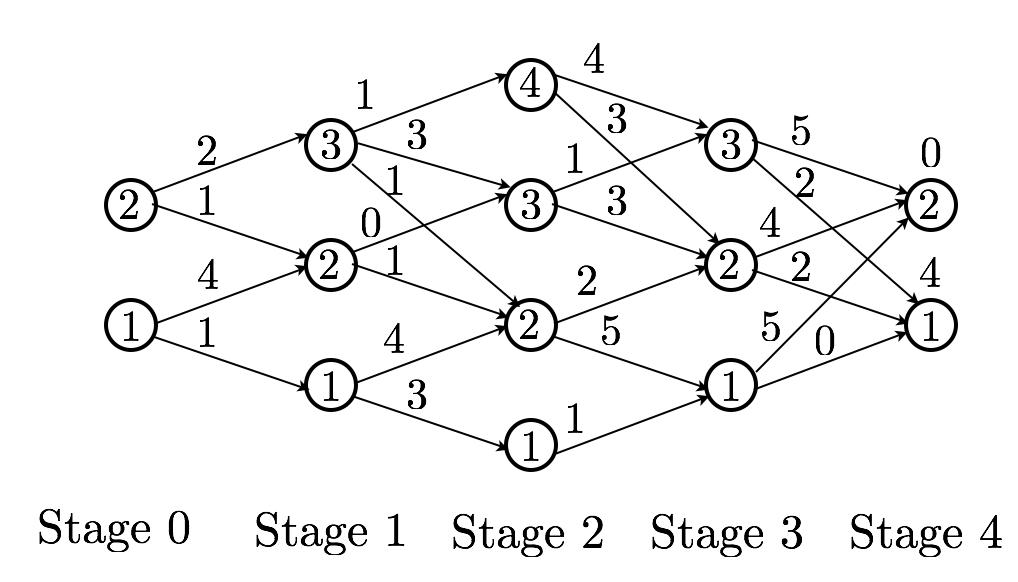
<center>Figure 1: Transition diagram of the example</center>


In [ ]:
import numpy as np

The function dptv.m implements the DP programming algorithm given the cell 
structures M, C and T, specified above, and it outputs the optimal policy and 
costs-to-go in the format discussed above. The optimal policy and decisions 
might not be unique and therefore the algorithm should provide all the optimal 
inputs for a given state and given stage in $u\{k+1\}\{i\}$. Note that due 
to numerical innacuracies the costs-to-go of two optimal decisions might be 
slightly different, and therefore it is important to introduce a threshold when 
deciding the number of optimal control inputs for a given stage and given state.

In [ ]:
def dptv(M,C,T):
    h = len(M)
    J_ = np.empty((h+1, 0)).tolist()
    J = np.empty((h, 0)).tolist()
    u = np.empty((h, 0)).tolist()
    for l in range(len(T)):
        J_[h].append(T[l])

    for k in range(h)[::-1]:
        ni = len(M[k]) # state dimension at stage k
        for i in range(ni):
            nj = len(M[k][i]) # input dimension at k, state i
            caux = np.zeros(nj)
            # compute the cost of each decision/input
            for j in range(nj):
                caux[j] = C[k][i][j] + J_[k+1][M[k][i][j]-1]
            # sort to understand which ones are optimal
            b = np.argsort(caux)
            a = caux[b]
            J_[k].append(a[0])
            J[k].append(J_[k][i])
            u[k].append([b[0]+1])
            # inputs for which the cost-to-go are sufficiently close (determined by threshold) to the optimal cost-to-go are also deemed optimal
            for ell in range(1,len(a)):
                if np.isinf(a[ell]) or np.isinf(a[0]):
                    break
                if abs(a[ell] - a[0]) < 1e-8:
                    u[k][i].append(b[ell]+1)
                else:
                    break

    return u, J

In [ ]:
# Cell structures C, M, Jh are first constructed according to the convention given above to represet the problem
stages = 4
M = np.empty((stages, 0)).tolist()
C = np.empty((stages, 0)).tolist()

In [ ]:
#stage 0
C[0] = np.empty((2, 0)).tolist(); M[0] = np.empty((2, 0)).tolist()
C[0][0] = np.empty((2, 0)).tolist(); M[0][0] = np.empty((2, 0)).tolist()
C[0][1] = np.empty((2, 0)).tolist(); M[0][1] = np.empty((2, 0)).tolist()
C[0][0][0] = 1; M[0][0][0] = 1
C[0][0][1] = 4; M[0][0][1] = 2
C[0][1][0] = 1; M[0][1][0] = 2
C[0][1][1] = 2; M[0][1][1] = 3

In [ ]:
#stage 1
C[1] = np.empty((3, 0)).tolist(); M[1] = np.empty((3, 0)).tolist()
C[1][0] = np.empty((2, 0)).tolist(); M[1][0] = np.empty((2, 0)).tolist()
C[1][1] = np.empty((2, 0)).tolist(); M[1][1] = np.empty((2, 0)).tolist()
C[1][2] = np.empty((3, 0)).tolist(); M[1][2] = np.empty((3, 0)).tolist()
C[1][0][0] = 3; M[1][0][0] = 1
C[1][0][1] = 4; M[1][0][1] = 2
C[1][1][0] = 1; M[1][1][0] = 2
C[1][1][1] = 0; M[1][1][1] = 3
C[1][2][0] = 1; M[1][2][0] = 2
C[1][2][1] = 3; M[1][2][1] = 3
C[1][2][2] = 1; M[1][2][2] = 4

In [ ]:
#stage 2
C[2] = np.empty((4, 0)).tolist(); M[2] = np.empty((4, 0)).tolist()
C[2][0] = np.empty((1, 0)).tolist(); M[2][0] = np.empty((1, 0)).tolist()
C[2][1] = np.empty((2, 0)).tolist(); M[2][1] = np.empty((2, 0)).tolist()
C[2][2] = np.empty((2, 0)).tolist(); M[2][2] = np.empty((2, 0)).tolist()
C[2][3] = np.empty((2, 0)).tolist(); M[2][3] = np.empty((2, 0)).tolist()

C[2][0][0] = 1; M[2][0][0] = 1
C[2][1][0] = 5; M[2][1][0] = 1
C[2][1][1] = 2; M[2][1][1] = 2
C[2][2][0] = 3; M[2][2][0] = 2
C[2][2][1] = 1; M[2][2][1] = 3
C[2][3][0] = 3; M[2][3][0] = 2
C[2][3][1] = 4; M[2][3][1] = 3


In [ ]:
#stage 3
C[3] = np.empty((3, 0)).tolist(); M[3] = np.empty((3, 0)).tolist()
C[3][0] = np.empty((2, 0)).tolist(); M[3][0] = np.empty((2, 0)).tolist()
C[3][1] = np.empty((2, 0)).tolist(); M[3][1] = np.empty((2, 0)).tolist()
C[3][2] = np.empty((2, 0)).tolist(); M[3][2] = np.empty((2, 0)).tolist()

C[3][0][0] = 0; M[3][0][0] = 1
C[3][0][1] = 5; M[3][0][1] = 2
C[3][1][0] = 2; M[3][1][0] = 1
C[3][1][1] = 4; M[3][1][1] = 2
C[3][2][0] = 2; M[3][2][0] = 1
C[3][2][1] = 5; M[3][2][1] = 2

In [ ]:
# Final cost
Jh = np.array((4,0))

In [ ]:
# function dtpv provides the optimal input and costs-to-go
[u, J] = dptv(M, C, Jh)

In [ ]:
u

In [ ]:
J

The result, i.e., the optimal policy and the costs-to-go are depicted in Figure 
2 (costs-to-go on top, and optimal policy specified by the arrows).


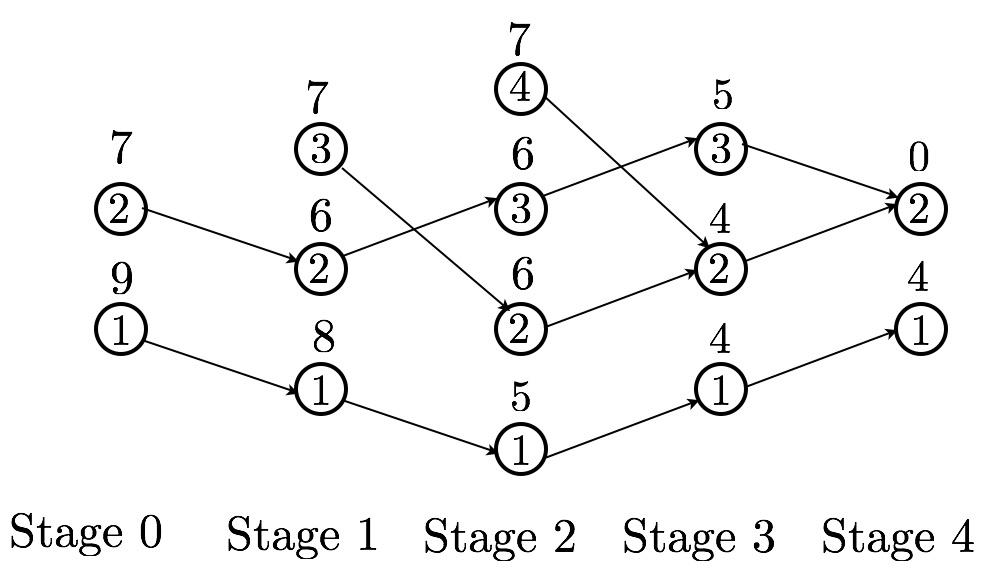
<center>Figure 2: Optimal policy and costs-to-go</center>

